# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Profissao- Cientista de Dados_M10_support material.csv")
df = df.drop(['Unnamed: 0', 'index', 'mau'], axis=1)

In [ ]:
#selecionar variáveis quantitativas
df_quant = df[['qtd_filhos', 'idade', 'tempo_emprego',
               "qt_pessoas_residencia", 'renda']]
df_quant

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29
14996,1,30,12.079452,3.0,2519.18
14997,0,40,2.161644,2.0,1586.85
14998,0,47,3.295890,2.0,6975.39


In [ ]:
y=df_quant['renda']
x=df_quant.drop('renda', axis=1)
y = pd.DataFrame(y)

In [ ]:
df_quant.dropna()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29
14996,1,30,12.079452,3.0,2519.18
14997,0,40,2.161644,2.0,1586.85
14998,0,47,3.295890,2.0,6975.39


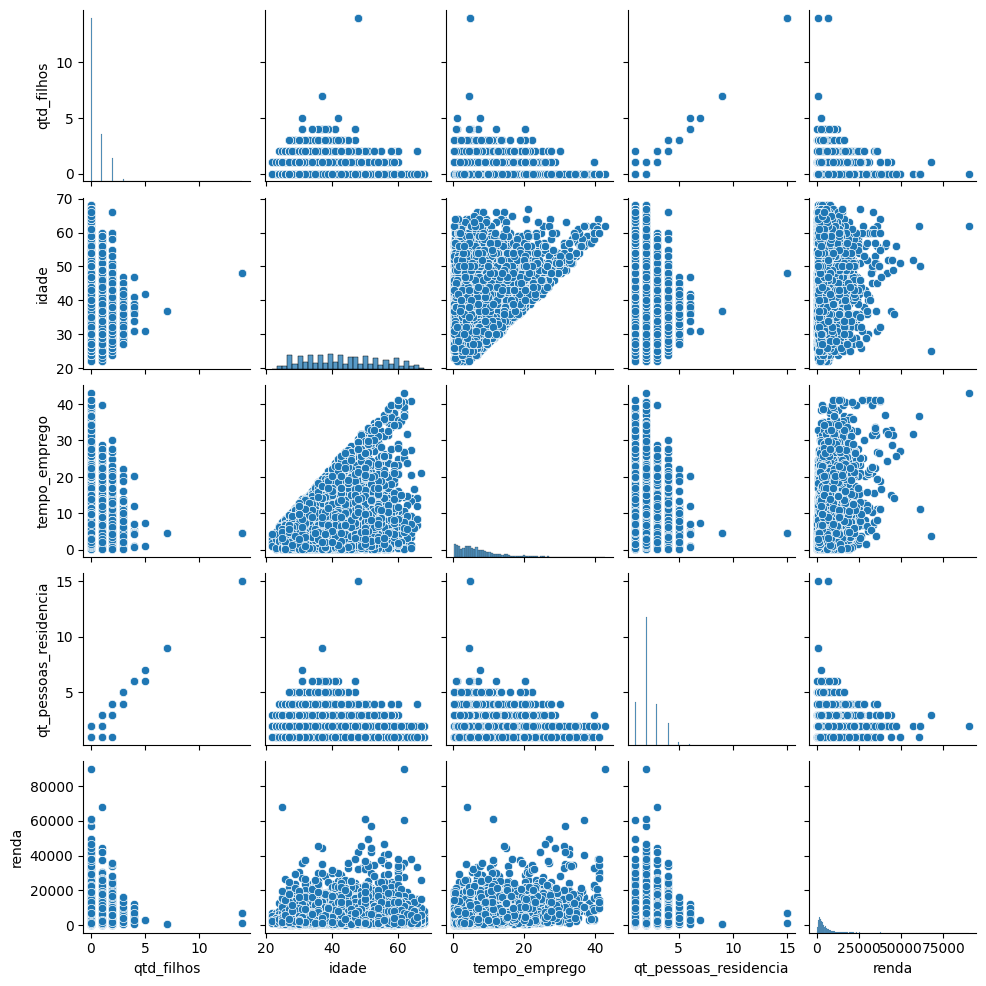

In [ ]:
sns.pairplot(df_quant, height=2)

In [ ]:
df_quant.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


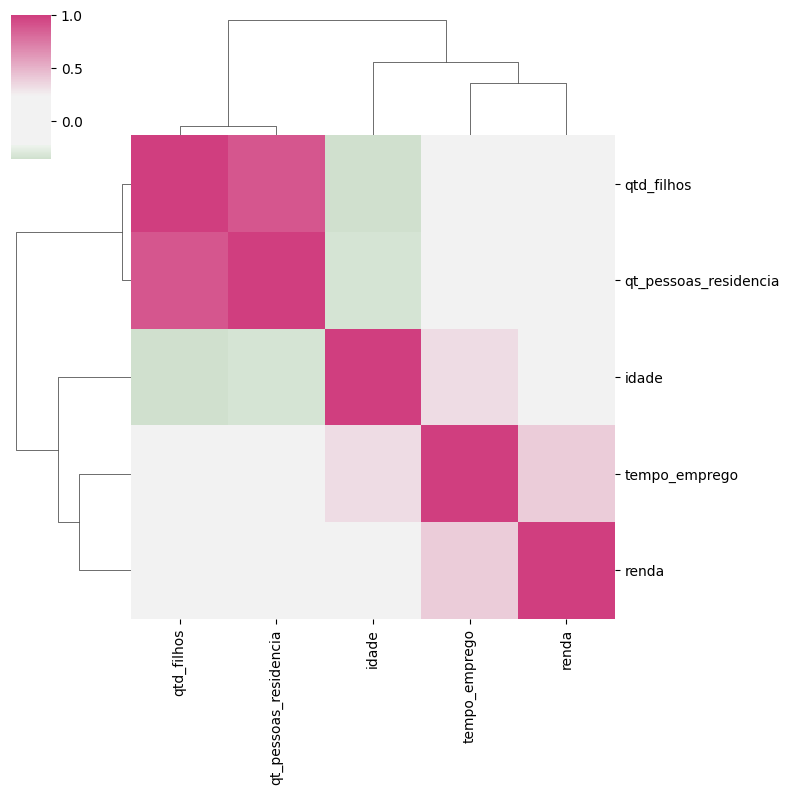

In [ ]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350,
                             as_cmap=True, sep = 60,
                             center = 'light')

sns.clustermap(df_quant.corr(), figsize=(8, 8), center = 0, cmap=cmap)

Apesar de ter diversos outliers, vemos uma ligação interessante entre idade e tempo de emprego, no qual o gráfico aumenta o tempo de emprego enquanto a idade também aumenta. Porém, existem pessoas com pouco tempo de emprego e mais velhas, fazendo com que o gráfico fique parecendo um triângulo. E também é a ligação com maior número de correlação que temos



2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

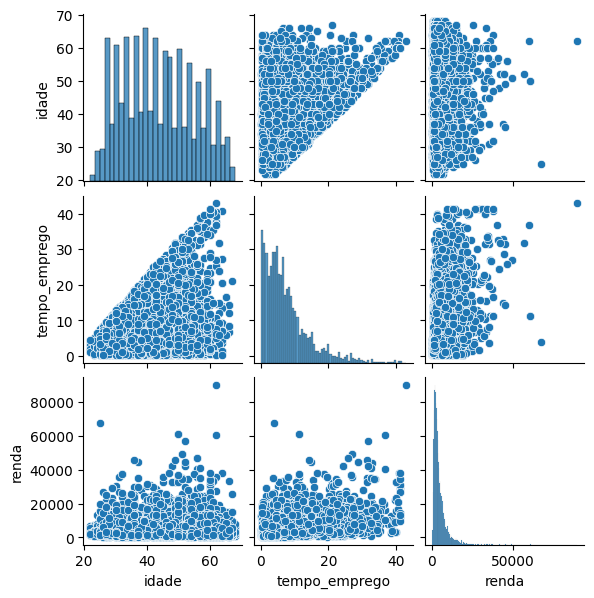

In [ ]:
df_quant2 = df[[ 'idade', 'tempo_emprego', 'renda']]
sns.pairplot(df_quant2, height=2)

3) Na sua opinião, há outliers na variável renda?

Sim.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

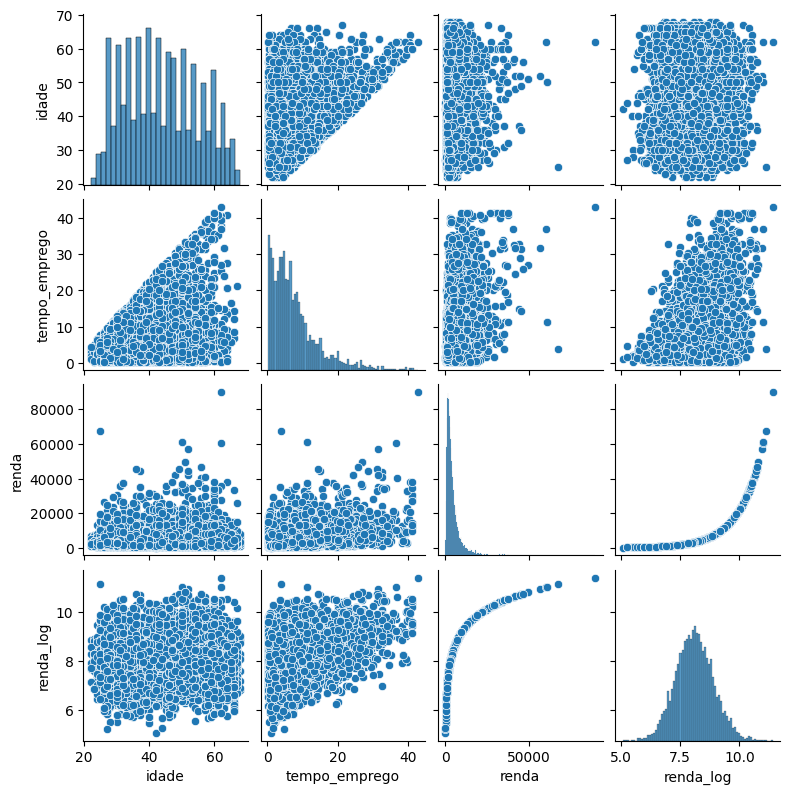

In [ ]:
df_log = df_quant2.copy()
df_log['renda_log'] = np.log(df_log['renda'])

sns.pairplot(df_log, height=2)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Observando dos gráficos depois do uso do log, na minha opinião melhorou a visualização, mas a análise nem tanto, teve uma melhora em relação ao tempo_emprego apenas.

In [ ]:
df_log.corr()

,idade,tempo_emprego,renda,renda_log
idade,1.000000,0.323934,0.042570,0.024712
tempo_emprego,0.323934,1.000000,0.394235,0.379556
renda,0.042570,0.394235,1.000000,0.835734
renda_log,0.024712,0.379556,0.835734,1.000000


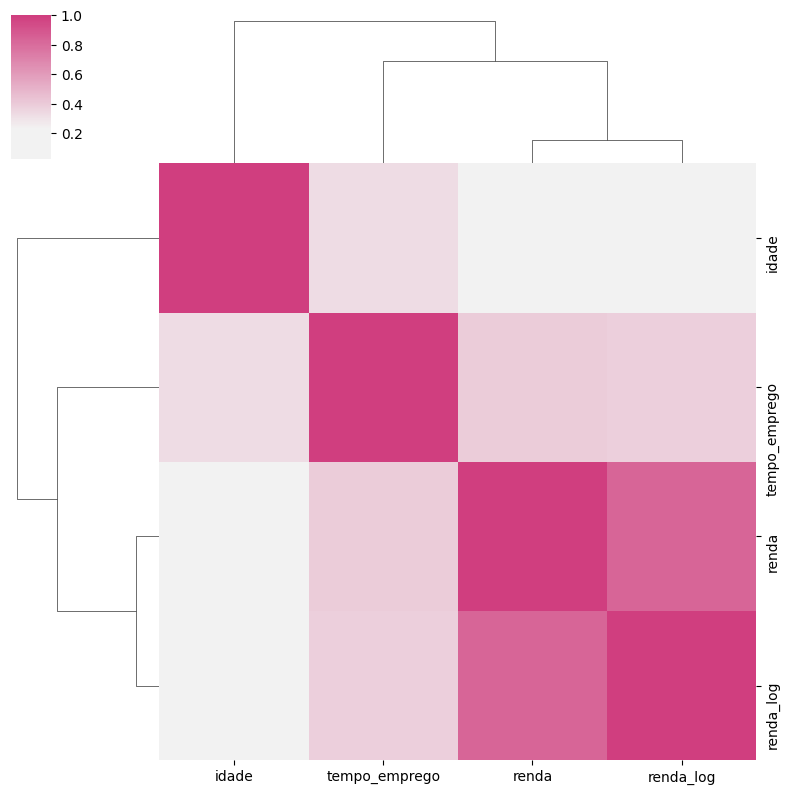

In [ ]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350,
                             as_cmap=True, sep = 60,
                             center = 'light')

sns.clustermap(df_log.corr(), figsize=(8, 8), center = 0, cmap=cmap)